<a href="https://colab.research.google.com/github/waifuisalie/Uni-Titanic-Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Analysis**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# allow google colab access
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# import excel file from google drive
file_path = "/content/drive/My Drive/Data_Classes/titanic.xlsx"
database = pd.read_excel(file_path)


## **What is the age distribution of the passengers?**

In [17]:
# lets select the header
ages_data = database['Age']

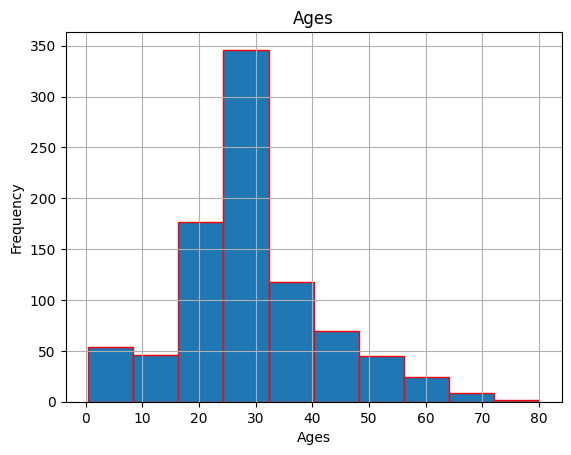

In [14]:
# lets create a histogram
ages_data.hist(edgecolor='red')
plt.title("Ages")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.show()

## **What is the predominance of the ages of the passengers?**

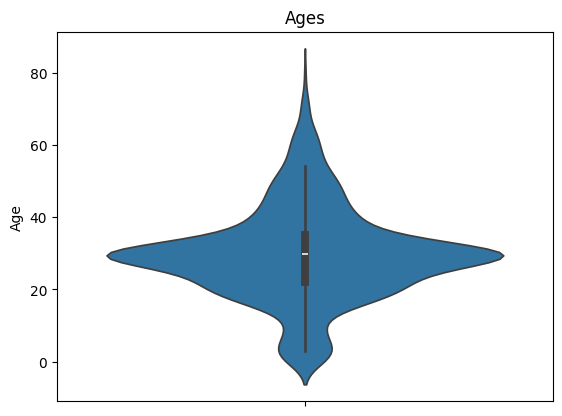

In [28]:
# lets make a violin plot
sns.violinplot(data=ages_data)
plt.title('Ages')
plt.show()

we can see that around 30 is the most predominant age.

## **Are there any unusual values in the age of the passengers?**

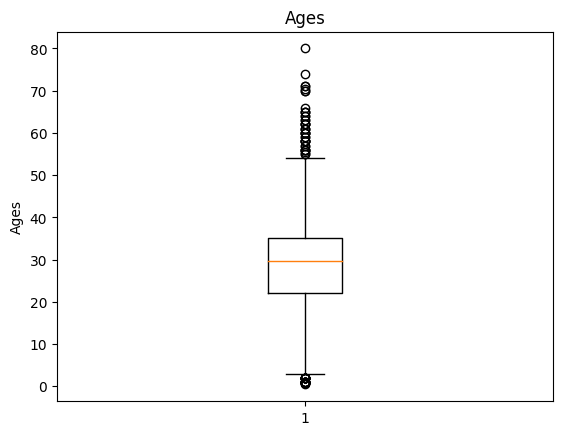

In [26]:
# lets make a box plot
plt.boxplot(ages_data)
plt.title("Ages")
plt.ylabel("Ages")
plt.show()

Yes, ages close to 0 and above 55 or so are considered outliers.

# **Extra Stuff**

In [57]:
# lets check our unfiltered dataset
ages_data.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
# lemme get the quartils
Q1 = np.percentile(ages_data, 25)
Q3 = np.percentile(ages_data, 75)

# calculate IQR
IQR = Q3 - Q1

# defining outlier criteria
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print('The lower bound is: ' + str(lower_bound))
print('The upper bound is: ' + str(upper_bound))

The lower bound is: 2.5
The upper bound is: 54.5


In [56]:
# lemme just be sure of the outliers
lower_outliers = ages_data[(ages_data < lower_bound)]
upper_outliers = ages_data[(ages_data > upper_bound)]
print("the number of lower outliers: " + str(lower_outliers.shape[0]))
print("the number of upper outliers: " + str(upper_outliers.shape[0]))

the number of lower outliers: 24
the number of upper outliers: 42


We conclude that most of the outliers are located above the upper bound, therefore, 'tipping' the average in favor to the far end of the dataset

## **Lets get rid of the outliers and see what happens:**

In [66]:
# filtering the dataset
filtered_db = ages_data[(ages_data > lower_bound) & (ages_data < upper_bound)]

# lets take a quick look at our filtered dataset
filtered_db.describe()

count    825.000000
mean      28.879689
std       10.182710
min        3.000000
25%       22.000000
50%       29.699118
75%       34.000000
max       54.000000
Name: Age, dtype: float64

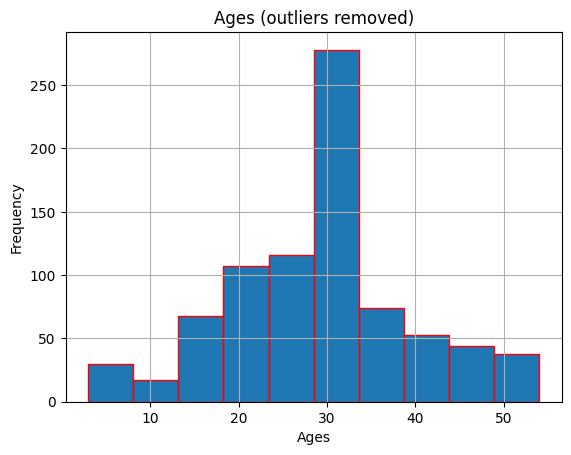

In [67]:
# lets make a histogram
filtered_db.hist(edgecolor='red')
plt.title('Ages (outliers removed)')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

wow, now it resembles a normal distribution!

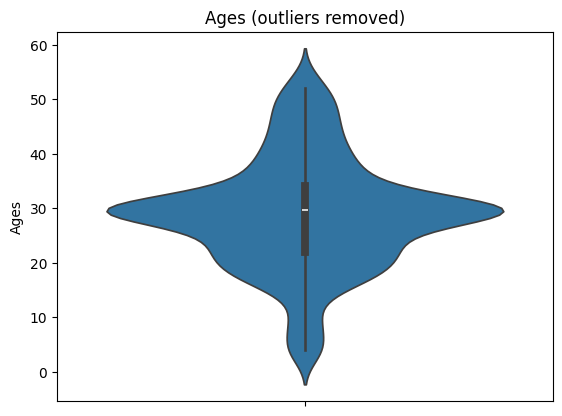

In [68]:
# lets make a violin plot
sns.violinplot(data=filtered_db)
plt.title('Ages (outliers removed)')
plt.ylabel('Ages')
plt.show()

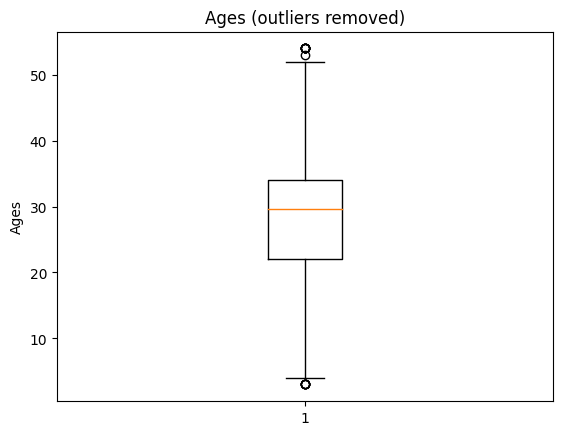

In [69]:
# lets make a box plot just to finish it off
plt.boxplot(filtered_db)
plt.title('Ages (outliers removed)')
plt.ylabel('Ages')
plt.show()

wow, there are still outliers in our dataset.